<h1 style="color:brown;">  Welcome to Modeling</h1> 

### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Lesson plan - linear regression & general approach to modelling
1. The story/ question 
2. The aim
3. Assumptions and constraints
4. Optimization
5. Metric
6. Interpretation - if time permits


What a model is ?

### How are the following factors related ?  

##### Example I : 
Dan went out with friends, drank, drove his car and crashed - he's ok 
Joe went out with friends, didn't drink, also drove his car and crashed as well 

![ChessUrl](https://media.giphy.com/media/hDJo64zI3T6da/giphy.gif "chess")

##### Example II: 
With every passing year, CO2 levels increase 

![Co2](https://media.giphy.com/media/VTQGgVfLeTL32/giphy.gif)

##### Example III: 
The more ice cream people eat, the more drownings we have.

![Ice-cream](https://media.giphy.com/media/3o6gDREoETcSrm9Wog/giphy.gif)

##### Question : is cutting trees bad for the enviornment ? are you using kindle from an enviornmental stance ? 
##### Example IV: 
I'm the owner of a paper factory. I want to know the volume of trees from their diameter.

![Lumber](https://media.giphy.com/media/UxTZDNv0Zej4s/giphy.gif)

##### Example V: 
An experiment was done with different concentrations of toxic substance to quantify effect on tumor incidence

![tumor](https://media.giphy.com/media/3o85xHEY82v0ZEpAwo/giphy.gif)

### 2. What is the aim of each example ?  take 5 minutes to tag each example !

##### Why are Causal statements tricky ? 

### 3. Why do we even need a model to find patterns in the data ? 

![biased tall](https://media.giphy.com/media/l0MYrguDYf6uvscak/giphy.gif)

In [65]:
##### Enter your answer here


<h2 style="color:purple;"> Assumption I: linear relation between X & Y </h2>

##### We are going to concentrate on drunken Dan for our hands on example

##### Load the data

In [2]:
## The possible seaborn datasets
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [3]:
## Load the car crashes dataset
car_crashes_df = sns.load_dataset('car_crashes')

In [6]:
car_crashes_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### a. What are possible simple linear regression models one might want to run here ?  

In [68]:
### Answer here 


In [9]:
# Choose specifically columns of total and alcohol  - give this df a different name than the original
alcohol_df = car_crashes_df.loc[:, ['total', 'alcohol']]
alcohol_df.head()

,total,alcohol
0,18.8,5.640
1,18.1,4.525
2,18.6,5.208
3,22.4,5.824
4,12.0,3.360


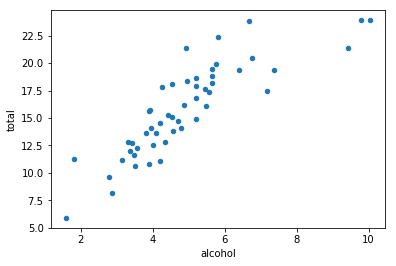

In [13]:
alcohol_df.plot.scatter('alcohol', 'total')

### b. Can you think of two quick statistical ways to check the intuition that alcohol 
### and car crashing index are linearly associated ?

In [18]:
stats.pearsonr(alcohol_df['alcohol'], alcohol_df['total'])

(0.8526132163334912, 2.0355934480666697e-15)

Hint: $\frac{cov(x, y)}{\sqrt{var(X)var(Y)}}$

### c.  let's calculate the correlation of alcohol and total crash index ? 

In [19]:
### Calculate the correlation coef with stats model
stats.pearsonr(alcohol_df['alcohol'], alcohol_df['total'])[0]

0.8526132163334912

In [27]:
###Calculate the correlation coef with numpy - pay attention that sample variance is different from population variance !

np.corrcoef(alcohol_df['alcohol'], alcohol_df['total'])[0, 1]




0.8526132163334914

##### Sample variance is biased 
- https://en.wikipedia.org/wiki/Bessel%27s_correction#Proof_of_correctness_-_Alternate_3
- much more rigorous math (proof) : https://mycourses.aalto.fi/pluginfile.php/364838/mod_resource/content/1/Proof%20that%20Sample%20Variance%20is%20Unbiased.pdf 

### d. Calculate both the covariance and correlation of the pairs: 
 - alcohol and not_distracted
 - alcohol and no_previous

In [34]:
## get covariance matrix (variance on the diagonal and covariance otherwise)
np.cov(car_crashes_df['alcohol'], car_crashes_df['total'])

array([[ 2.98990061,  6.07699184],
       [ 6.07699184, 16.99090196]])

In [32]:
## get only the value of the covariance between alcohol and no_previous
np.cov(car_crashes_df['alcohol'], car_crashes_df['no_previous'])

array([[ 2.98990061,  5.10041559],
       [ 5.10041559, 14.17275451]])

In [33]:
## now let's get the coeficient of determination of both pairs
stats.pearsonr(car_crashes_df['alcohol'], car_crashes_df['no_previous'])

(0.7835199456551566, 1.070086030113589e-11)

In [40]:
stats.pearsonr(car_crashes_df['alcohol'], car_crashes_df['not_distracted'])


(0.7328163816427739, 9.746382674548943e-10)

##### Do you understand the results ? 
covariance results can be misleading since they take into account measurements in different units
and thus are hard to compare (think of cm versus meters - i'm used to this metrics at least :))

### If you were to choose only one number (constant) for the model what would it be ? 
### Talk with a peer and calculate this number from the data set.

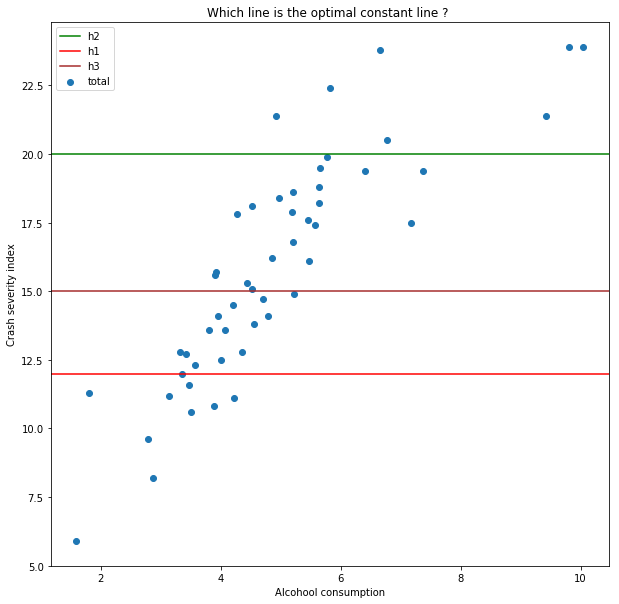

In [36]:
plt.figure(figsize=(10, 10))
plt.scatter(car_crashes_df['alcohol'], car_crashes_df['total'])
plt.axhline(y=20, color = 'green', label = 'h2')
plt.axhline(y=12, color = 'red', label = 'h1')
plt.axhline(y=15, color = 'brown', label = 'h3')
plt.legend()
plt.xlabel('Alcohool consumption')
plt.ylabel('Crash severity index')
plt.title('Which line is the optimal constant line ? ')
plt.show()

![confused](https://media.giphy.com/media/3o7btPCcdNniyf0ArS/giphy.gif)

### Can we tilt the line to get a better fit ? 

### 4. Optimal

##### Deciding on the optimal line requires us to define what is optimal - this is similar to all learning algorithms 

Our goal is to minimise the loss function (errors squared)
$MSE = \frac{1}{n} \sum (actual - predicted)^2$

##### a. Calculate the sum of errors from your model ? Do you understand why you got this result ? 
##### Will it be the same for non constant number ? https://autarkaw.org/2017/07/06/sum-of-the-residuals-for-the-linear-regression-model-is-zero/

In [57]:
# Enter answer here
y = np.mean(car_crashes_df['total'])
a = (car_crashes_df.total - y)  # .map(lambda x: (x-15)**2).mean()
a.mean()

2.4729673646552505e-15

In [68]:
# Please take 3 min to explore the ols method of smf package
?smf.ols
est = smf.ols(formula='total~alcohol', data=alcohol_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     130.5
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           2.04e-15
Time:                        17:05:03   Log-Likelihood:                -110.99
No. Observations:                  51   AIC:                             226.0
Df Residuals:                      49   BIC:                             229.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8578      0.921      6.357      0.000       4.006       7.709
alcohol        2.0325      0.178     11.422      0.000       1.675       2.390
==============================================================================
Omnibus:                        1.922   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.705
Skew:                           0.439   Prob(JB):                        0.426
Kurtosis:                       2.824   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2 style="color:purple;">  We can tilt it! now our goal is to find a line such that </h2>


$\hat y_i  = ax_i + b$ 

### 5. Metrics

#### how do I know if it is really a good model ? 

![e-commerce](https://media.giphy.com/media/3o6ZsYYi4MmCcr9KN2/giphy.gif)

In [ ]:
### Take 2 minutes to plot (lmplot) with seaborn 'alcohol' as your explanatory variable and 'ins_premium' as your target

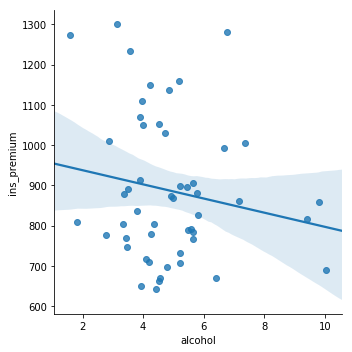

In [77]:
sns.lmplot('alcohol', 'ins_premium', car_crashes_df)

### For linear regression specifically we can talk about R^2

$ R^2 = 1 - \frac {\sum (y_i - \hat y)^2} {\sum (y_i - y_{mean})^2}$

In [ ]:
### Take 3 min to calculate the R^2 using stats.linregress

In [92]:
# Enter answer here

stats.linregress(car_crashes_df['alcohol'], car_crashes_df['total'])


LinregressResult(slope=2.03250630393241, intercept=5.857776154826293, rvalue=0.8526132163334913, pvalue=2.035593448066637e-15, stderr=0.17795223653545852)

##### Should we always count on R^2 ? 

### Are we done ? 

![](https://media.giphy.com/media/5bofVYmYAEDVCYERcf/giphy.gif)

### We need more assumptions..  

<h2 style="color:purple;"> Assumption II: errors are independent </h2>

<h2 style="color:purple;"> Assumption III: errors are normally distributed </h2>

<h2 style="color:purple;"> Assumption IV: errors have mean 0 and std sigma (homoscedastic)</h2>

![](https://i.stack.imgur.com/yEqcg.png)

### How can we check model assumptions ? (these are only few suggestions)

1. scatter plot  - check linearity, constant variance and outliers 

2. standardized residuals vs. explanatory variable - should look like a cloud because of independence assumption

3. predicted values vs. standardized residuals - should look like a cloud (comes out from the math)

4. Histograms for standardized residuals

5. Q-Q plots

What are standardized residuals [by Dr Giampiero Marra] : 
    Residuals and standardized residuals. The residuals are the deviations of the observations of their “ideal” value according to the model.
    They can be interpreted as estimators of the errors ei (and are therefore denoted by eˆi). This suggests that the residuals can be used to assess the model assumptions about the errors. The standard- ised residuals are residuals divided by their estimated standard deviations, so that the standardized residuals should have a standard deviation of 1, which helps assessing their size. Too many standardised residuals with magnitude greater than 2 suggests that the error distribution has heavier tails than a normal distribution, but note that about 5% of standardised residuals are expected to be larger than 2 in magnitude even if the errors are normally distributed (remember that 2 ≈ 1.96 = 97.5% quantile of the standard normal distribution).

### Let's take a go and try to check the assumptions of linear regression
### and then run a model

##### 1. Check the linear regression assumptions (use histograms, Q-Q plots, scatter plots, residual plots)
##### 2. Write down the equation you got. How do you interpret it ? 
##### 3. Write down the confidence intervals for the intercept and slope
##### 4. Are any of the parameters insignificant ? 
##### 5. Add a column to data frame with the prediction (according to the equation you got)

### Check model assumptions 

### Construct the model

In [9]:
## Plot linear regression line with confidence band
